# ＪＸ金属 日足

In [1]:
import sys
sys.path.append('..')

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '5016.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='3mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-19 00:00:00+09:00,832.122595,871.606466,831.135498,862.722595,175980400,0.0,0.0
2025-03-21 00:00:00+09:00,896.283893,954.522604,893.322603,945.638733,147470400,0.0,0.0
2025-03-24 00:00:00+09:00,978.212917,1026.580660,945.638723,952.548401,111144700,0.0,0.0
2025-03-25 00:00:00+09:00,978.212905,978.212905,916.025808,922.935486,52074400,0.0,0.0
2025-03-26 00:00:00+09:00,916.025824,953.535502,904.180662,930.832275,40361600,0.0,0.0
2025-03-27 00:00:00+09:00,922.935484,933.793548,906.154839,918.000000,22273000,0.0,0.0
2025-03-28 00:00:00+09:00,920.000000,950.000000,908.000000,915.000000,21235900,12.0,0.0
2025-03-31 00:00:00+09:00,886.000000,907.000000,882.000000,889.000000,18471400,0.0,0.0


## 日足チャートとパラボリック SAR

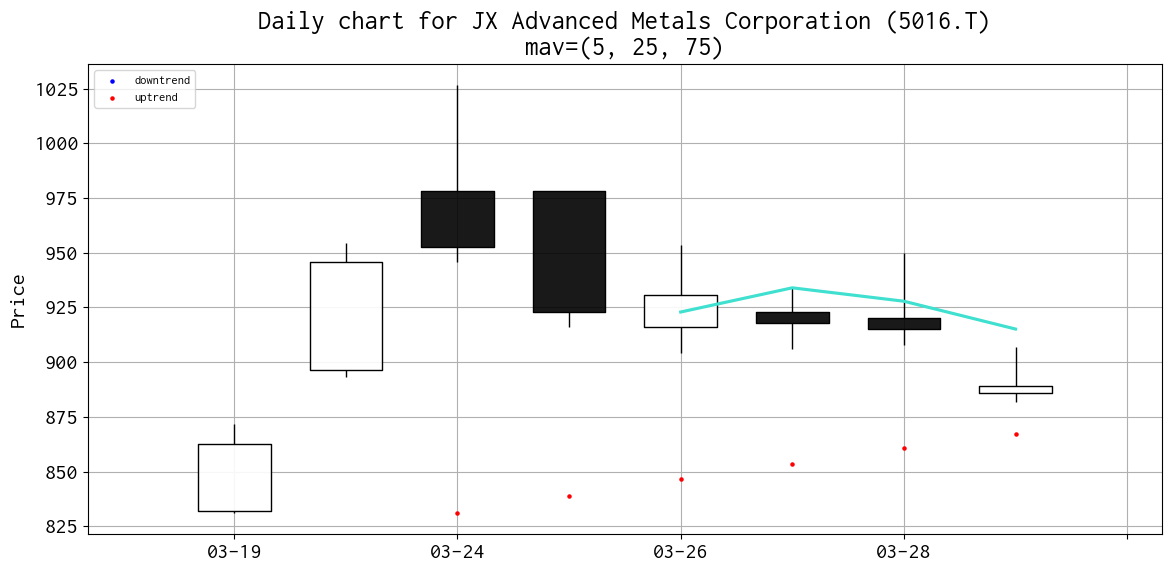

In [3]:
dict_psar = psar(df)

FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(dict_psar['bear'], type='scatter', marker='o', markersize=5, color='blue', label='downtrend', ax=ax),
    mpf.make_addplot(dict_psar['bull'], type='scatter', marker='o', markersize=5, color='red', label='uptrend', ax=ax),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()
ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-03-28 00:00:00+09:00    915.0
2025-03-31 00:00:00+09:00    889.0
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-03-28 00:00:00+09:00     NaN
2025-03-31 00:00:00+09:00   -26.0
Name: Close, dtype: float64